In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()

In [38]:
def plot(colums, df):
    plt.plot(df["Raman Shift"],df[colums])
    plt.xlabel('Raman Shift (/cm)',fontsize=14)
    plt.ylabel('Intensity (a.u.)',fontsize=14)
    plt.yticks([])
    plt.savefig("name", dpi = 600)
# TODO: 
#Add x mirror axis
#start curve at the lower left corner
#Add legend

In [39]:
# define columns
csv_path ="spectra_datapoint.csv"
names_columns = ["Raman Shift","Beechwood","Pinewood","Cellulose","Lignin",
                 "Wheat straw","Xylan","Rice Husk °C/min","Rice Husk °C/s"]
wood_columns=["Beechwood","Pinewood","Wheat straw"]
rice_columns=["Rice Husk °C/min","Rice Husk °C/s"]
cell_columns=["Cellulose","Lignin","Xylan"]

In [40]:
df = pd.read_table(csv_path, sep= ',',names = names_columns)

In [41]:
#normalization
normalized_columns = ["Beechwood","Pinewood","Cellulose","Lignin",
                      "Wheat straw","Xylan","Rice Husk °C/min","Rice Husk °C/s"]
x = df[normalized_columns].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=normalized_columns, index = df.index)
df[normalized_columns] = df_temp

In [42]:
#df.head()
df.tail()

,Raman Shift,Beechwood,Pinewood,Cellulose,Lignin,Wheat straw,Xylan,Rice Husk °C/min,Rice Husk °C/s
471,2504.47,0.027745,0.007361,0.015301,0.015573,0.002814,0.014155,0.029513,0.025391
472,2508.45,0.032617,0.007026,0.011107,0.014710,0.021335,0.013402,0.033483,0.017367
473,2512.42,0.021074,0.002230,0.014284,0.013604,0.005175,0.012729,0.034864,0.021836
474,2516.39,0.000000,0.007388,0.010573,0.012770,0.010894,0.011725,0.025889,0.046212
475,2520.36,0.013343,0.006998,0.009099,0.012163,0.019700,0.010742,0.026061,0.001930


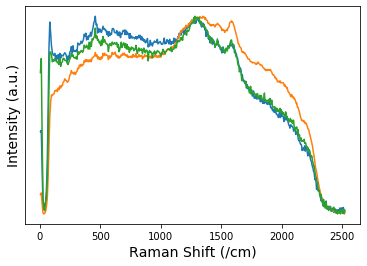

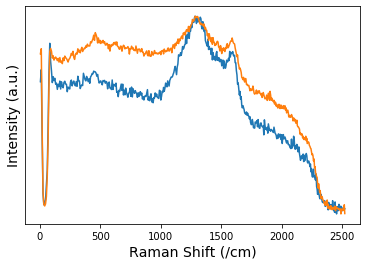

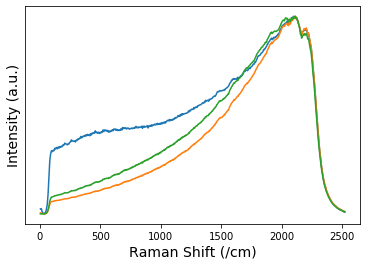

In [43]:
plot(wood_columns,df)
plt.show()
plot(rice_columns,df)
plt.show()
plot(cell_columns,df)
plt.show()

In [25]:
#Stavinski filter
#run before the block above
#does not workkkkk
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    # https://fr.wikipedia.org/wiki/Algorithme_de_Savitzky-Golay
    
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [26]:
#smoothing data
smoothed_columns = ["Beechwood","Pinewood","Cellulose","Lignin",
                      "Wheat straw","Xylan","Rice Husk °C/min","Rice Husk °C/s"]

for column in smoothed_columns :
    x = df[column].values
    x_smoothed = savitzky_golay(x, 31, 3)
    df_temp = pd.DataFrame(x_smoothed, columns=[column], index = df.index)
    df[column] = df_temp

In [27]:
import matplotlib.pyplot as plt
plt.close('all')

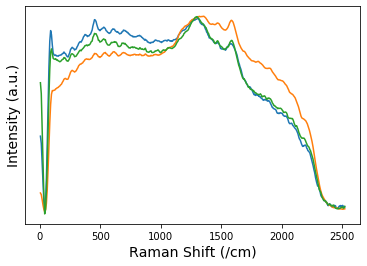

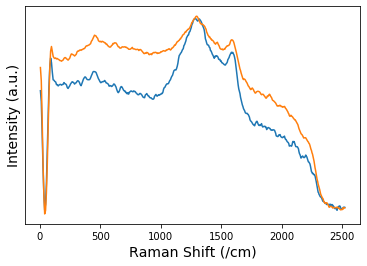

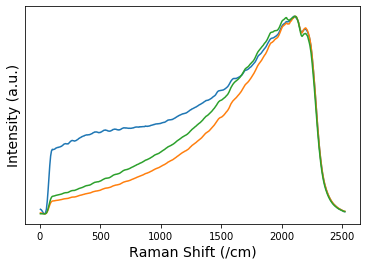

In [28]:
plot(wood_columns,df)
plt.show()
plot(rice_columns,df)
plt.show()
plot(cell_columns,df)
plt.show()